In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy.spatial.transform import Rotation

import os
from pathlib import Path

def wc2cc(world_coordinate, R, T):
    # camera_coordinate = np.dot(R, (world_coordinate - T).T).T
    camera_coordinate = np.dot(R, world_coordinate.T).T + T
    return camera_coordinate

def cc2ic(cc, cam_calib):
    f = cam_calib['fc']
    c = cam_calib['cc']
    joint_img = np.zeros(cc.shape)
    joint_img[:, 0], joint_img[:, 1], joint_img[:, 2] = __cam2pixel(cc, f, c)  # x,y
    joint_img[:, 2] = joint_img[:, 2]  # z
    return joint_img

def __cam2pixel(cc, f, c):
        u = cc[..., 0] / cc[..., 2] * f[0] + c[0]
        v = cc[..., 1] / cc[..., 2] * f[1] + c[1]
        d = cc[..., 2]
        return u, v, d

def v2p(video_path, img_path, x1=0, x2=0, y1=0, y2=0):

    if not os.path.exists(img_path):
        os.makedirs(img_path)

    if not img_path.endswith('/'):
        img_path = img_path + '/'

    cap = cv2.VideoCapture(video_path)
    # print(cap.isOpened())

    frames = 0
    count = 0

    fps = cap.get(cv2.CAP_PROP_FPS)
    print('fps: ', fps)

    flag = 1
    while(flag):
        flag, frame = cap.read()
        frames += 1
        if not flag:
            print(flag)
            print(video_path, ' finished!')
            break
        else:
            # if frames % 10 == 0:
            #     count += 1
            frame = frame[y1:frame.shape[0]-y2-1, x1:frame.shape[1]-x2-1]
            img_name = img_path + Path(video_path).stem + str(count).rjust(5, '0') + '.jpg'
            cv2.imwrite(img_name, frame, [cv2.IMWRITE_JPEG_QUALITY, 100])
        
    cap.release()
    print('Total %s pictures saved.' % count)

In [2]:
directory = 'multi_view_data'
b = 0
for folder in os.listdir(directory):
    F = os.path.join(directory, folder)
    if os.path.isdir(F):
        for file in os.listdir(F):
            if file.endswith('avi'):
                pose_type, name, camera_id = file[:-4].split('_')
                video_file = os.path.join(F, file)
                camera_id = camera_id[-1]
                cam_calib_file = os.path.join(F, 'Calib_Cam{}.mat'.format(camera_id))
                
                """****"""
                gt_file = os.path.join(F, '{}_{}_GT.mat'.format(pose_type, name))
                gt = loadmat(gt_file)

                cam_calib = loadmat(cam_calib_file)
                v2p(video_file, 'output/')

                world_coordinate = gt['GTpose2'][0][0]
                K = cam_calib['KK']
                T = cam_calib['T_ext']
                f = cam_calib['fc']
                # R = Rotation.from_euler('xyz', cam_calib['om_ext'][0], degrees=False).as_matrix()
                # R = Rotation.from_mrp(cam_calib['om_ext'][0]).as_matrix()
                R = Rotation.from_rotvec(cam_calib['om_ext'][0]).as_matrix()
                camera_coordinate = wc2cc(world_coordinate, R, T)  #.astype(int)
                ic = cc2ic(camera_coordinate, cam_calib)
                """****"""
                # if loadmat(gt_file)['GTpose2'][0][0].shape[0] == 19:
                #     pass

                # cam_bg = os.path.join(f, 'Background_YUV_C{}.mat'.format(camera_id))
# print(gt_file)
# print(cam_calib_file)
# print(video_file)

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'multi_view_data'

In [103]:
from collections import defaultdict
d = defaultdict(dict)

In [104]:
directory = 'multi_view_data'
b = 0
for folder in os.listdir(directory):
    F = os.path.join(directory, folder)
    if os.path.isdir(F):
        for file in os.listdir(F):
            if file.endswith('avi'):
                pose_type, name, camera_id = file[:-4].split('_')
                video_file = os.path.join(F, file)
                camera_id = camera_id[-1]
                cam_calib_file = os.path.join(F, 'Calib_Cam{}.mat'.format(camera_id))
                
                """****"""
                gt_file = os.path.join(F, '{}_{}_GT.mat'.format(pose_type, name))
                gt = loadmat(gt_file)
                
                if loadmat(gt_file)['GTpose2'][0][0].shape[0] != 19:
                    continue
                print(F, file)
                cam_calib = loadmat(cam_calib_file)
                # v2p(video_file, 'output/')
                
                K = cam_calib['KK']
                T = cam_calib['T_ext']
                f = cam_calib['fc']
                coord_list = []
                d[name]['wc'] = gt['GTpose2'][0]
                for world_coordinate in gt['GTpose2'][0]:
                    # R = Rotation.from_euler('xyz', cam_calib['om_ext'][0], degrees=False).as_matrix()
                    # R = Rotation.from_mrp(cam_calib['om_ext'][0]).as_matrix()
                    R = Rotation.from_rotvec(cam_calib['om_ext'][0]).as_matrix()
                    camera_coordinate = wc2cc(world_coordinate, R, T)  #.astype(int)
                    ic = cc2ic(camera_coordinate, cam_calib)
                    coord_list.append(ic)
                """****"""
                d[name]['Cam'+camera_id] = {
                    'camera_coordinate': coord_list,
                    'calib': cam_calib
                    }
                

                # cam_bg = os.path.join(f, 'Background_YUV_C{}.mat'.format(camera_id))
# print(gt_file)
# print(cam_calib_file)
# print(video_file)

multi_view_data/HipHop HipHop_HipHop2_C1.avi
multi_view_data/HipHop HipHop_HipHop1_C0.avi
multi_view_data/HipHop HipHop_HipHop1_C1.avi
multi_view_data/HipHop HipHop_HipHop1_C2.avi
multi_view_data/HipHop HipHop_HipHop2_C0.avi
multi_view_data/HipHop HipHop_HipHop2_C2.avi
multi_view_data/HipHop HipHop_HipHop3_C0.avi
multi_view_data/HipHop HipHop_HipHop3_C1.avi
multi_view_data/HipHop HipHop_HipHop3_C2.avi
multi_view_data/HipHop HipHop_HipHop4_C0.avi
multi_view_data/HipHop HipHop_HipHop4_C1.avi
multi_view_data/HipHop HipHop_HipHop4_C2.avi
multi_view_data/HipHop HipHop_HipHop5_C0.avi
multi_view_data/HipHop HipHop_HipHop5_C1.avi
multi_view_data/HipHop HipHop_HipHop5_C2.avi
multi_view_data/HipHop HipHop_HipHop6_C0.avi
multi_view_data/HipHop HipHop_HipHop6_C1.avi
multi_view_data/HipHop HipHop_HipHop6_C2.avi
multi_view_data/Jazz Jazz_Jazz2_C0.avi
multi_view_data/Jazz Jazz_Jazz1_C0.avi
multi_view_data/Jazz Jazz_Jazz1_C1.avi
multi_view_data/Jazz Jazz_Jazz1_C2.avi
multi_view_data/Jazz Jazz_Jazz2_C1

In [120]:
for i in d['Volleyball']['wc']:
    print()

dict_keys(['wc', 'Cam0', 'Cam1', 'Cam2'])

In [122]:
for key, value in d['Volleyball'].items():
    if key == 'wc':
        continue
    print(key)
    print(value['calib']['KK'])
    print(value['calib']['kc'].T)
    print(value['calib'].keys())

Cam0
[[418.43368939   0.         258.35183943]
 [  0.         416.0150073  176.56153735]
 [  0.           0.           1.        ]]
[[-0.37623118  0.20914033  0.00360008  0.00060169  0.        ]]
dict_keys(['__header__', '__version__', '__globals__', 'kc', 'KK', 'alpha_c', 'cc', 'fc', 'om_ext', 'T_ext'])
Cam1
[[418.43368939   0.         258.35183943]
 [  0.         416.0150073  176.56153735]
 [  0.           0.           1.        ]]
[[-0.37623118  0.20914033  0.00360008  0.00060169  0.        ]]
dict_keys(['__header__', '__version__', '__globals__', 'kc', 'KK', 'alpha_c', 'cc', 'fc', 'om_ext', 'T_ext'])
Cam2
[[418.43368939   0.         258.35183943]
 [  0.         416.0150073  176.56153735]
 [  0.           0.           1.        ]]
[[-0.37623118  0.20914033  0.00360008  0.00060169  0.        ]]
dict_keys(['__header__', '__version__', '__globals__', 'kc', 'KK', 'alpha_c', 'cc', 'fc', 'om_ext', 'T_ext'])


In [156]:
best = [0, 0]
for i in range(19):
    total_disp = 0
    keypoint = c[:, i,  :2]
    last = keypoint[0]
    for frame in keypoint[1::]:
        total_disp += np.sqrt(np.sum(np.square(frame-last)))
        last=frame
    if total_disp > best[1]:
        best = [i, total_disp]

for key, value in d['Volleyball'].items():
    if key == 'wc':
        continue
    
    print(key)
    for idx, row in enumerate(value['camera_coordinate']):
        print(idx+1, end=' ')
        for i in row[best[0]][0:2]:
            print(i, end=' ')
        print()

Cam0
1 350.5256573703265 116.56373224129737 
2 350.73580790042547 116.85322271660434 
3 351.09361361275637 117.53302223190462 
4 351.63375883609194 118.70285235006337 
5 352.3097610975617 120.64021051182854 
6 352.7337129553652 123.65778302929968 
7 352.39462810741486 128.09252127115244 
8 350.51209884559876 134.45981837334733 
9 346.73665836702133 143.3568104386835 
10 340.9822944361551 154.69360528417218 
11 333.328569102536 167.48534182195067 
12 323.7182929673206 181.04420041747818 
13 311.7689851413157 194.29445627402566 
14 298.41465106280174 206.0814701194759 
15 284.49482443252026 215.42318255976812 
16 270.57925264824246 221.34219305671536 
17 258.6947899756022 223.66302753956643 
18 250.29079940002097 223.38228164615745 
19 244.6378546130371 222.36911735448246 
20 240.42835858377745 221.3623375204923 
21 236.89401709137732 220.6827301985561 
22 233.26805655704578 220.40597321863424 
23 228.7686082940872 220.7486088443825 
24 222.55231358307708 222.13228359184404 
25 214.26694

In [168]:
for idx, row in enumerate(d['Volleyball']['wc']):
    print(idx+1, end=' ')
    for i in row[best[0]][0:3]:
        print(i, end=' ')
    print()

1 -885.7399 1609.4868150000002 336.560255 
2 -886.056975 1606.240055 330.840255 
3 -886.519775 1599.278135 320.91411000000005 
4 -886.80899 1587.4586199999999 304.27278 
5 -885.99695 1568.43591 278.61811 
6 -880.67221 1539.8524149999998 241.795485 
7 -867.8524199999999 1500.31482 196.94862 
8 -842.650635 1447.187375 145.949715 
9 -803.82416 1377.656375 91.53022999999999 
10 -753.13095 1294.28076 41.262010000000004 
11 -693.1500249999999 1204.763 2.980225000000001 
12 -624.171965 1113.16174 -18.552375 
13 -543.00433 1025.180665 -22.644060000000003 
14 -454.60183500000005 946.79117 -8.648230000000002 
15 -362.73123 883.233305 22.26754 
16 -269.29587000000004 841.2484750000001 60.3268 
17 -187.657815 823.18231 97.03979000000001 
18 -128.741475 823.53366 124.16497999999999 
19 -88.71997 829.939085 137.864295 
20 -59.195995 837.245945 138.07737 
21 -35.024065 842.9493749999999 127.665985 
22 -10.578675 846.0213 114.123595 
23 19.81465 844.737125 101.716555 
24 62.04462 836.2091049999999 91.

In [169]:
c= d['Volleyball']['Cam0']['camera_coordinate']

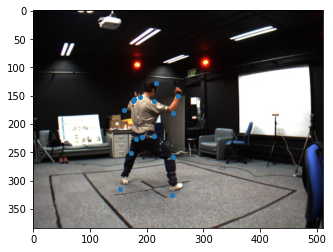

In [170]:
gt = loadmat(gt_file)
cam_calib = loadmat(cam_calib_file)
cap = cv2.VideoCapture(video_file)

flag, frame = cap.read()
world_coordinate = gt['GTpose2'][0][0]
K = cam_calib['KK']
T = cam_calib['T_ext']
f = cam_calib['fc']
# R = Rotation.from_euler('xyz', cam_calib['om_ext'][0], degrees=False).as_matrix()
# R = Rotation.from_mrp(cam_calib['om_ext'][0]).as_matrix()
R = Rotation.from_rotvec(cam_calib['om_ext'][0]).as_matrix()
camera_coordinate = wc2cc(world_coordinate, R, T)  #.astype(int)
ic = cc2ic(camera_coordinate, cam_calib)
plt.imshow(frame[:,:,::-1])
plt.plot(ic[:,0], ic[:,1], 'o', markersize=4)
plt.show()

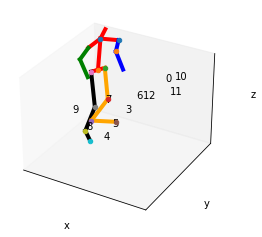

In [678]:
def visualize_3d(p3ds):
    """Now visualize in 3D"""
    torso = [[0, 18] , [0, 10], [0, 14], [0, 1], [1, 2], [1, 6]]
    armr = [[14, 15], [15, 16]]
    arml = [[10, 11], [11, 12]]
    legr = [[6, 7], [7, 8], [8, 9]]
    legl = [[2, 3], [3, 4], [4, 5]]
    body = [torso, arml, armr, legr, legl]
    colors = ['red', 'blue', 'green', 'black', 'orange']

    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for framenum, kpts3d in enumerate(p3ds):
        if framenum%2 == 0: continue #skip every 2nd frame
        for bodypart, part_color in zip(body, colors):
            for _c in bodypart:
                ax.plot(ys = [kpts3d[_c[0],0], kpts3d[_c[1],0]], zs = [kpts3d[_c[0],1], kpts3d[_c[1],1]], xs = [kpts3d[_c[0],2], kpts3d[_c[1],2]], linewidth = 4, c = part_color)

        #uncomment these if you want scatter plot of keypoints and their indices.
        for i in range(12):
            ax.text(kpts3d[i,0], kpts3d[i,1], kpts3d[i,2], str(i))
            ax.scatter(ys = kpts3d[i:i+1,0], zs = kpts3d[i:i+1,1], xs = kpts3d[i:i+1,2])


        #ax.set_axis_off()
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

        ax.set_xlim3d(-500, 1000)
        ax.set_xlabel('x')
        ax.set_ylim3d(-500, 1000)
        ax.set_ylabel('y')
        ax.set_zlim3d(-500, 1000)
        ax.set_zlabel('z')
        plt.pause(0.1)
        ax.cla()

visualize_3d(np.array([world_coordinate, world_coordinate]))

In [82]:
joints = ['neck', 'pelvis', 'left hip', 'left knee', 'left ankle', 'left foot', 'right hip', 'right knee', 'right ankle', 'right foot', 'left shouler', 'left elbow', 'left wrist', 'left hand', 'right shoulder', 'right elbow', 'right wrist', 'right hand', 'head']
order = [10, 14, 11, 15, 13, 17, 2, 6, 3, 7, 4, 8]
joints_12 = [joints[i] for i in order]
joints_12

['left shouler',
 'right shoulder',
 'left elbow',
 'right elbow',
 'left hand',
 'right hand',
 'left hip',
 'right hip',
 'left knee',
 'right knee',
 'left ankle',
 'right ankle']

In [641]:
for idx, i in enumerate(joints):
    print(idx, i)

0 neck
1 pelvis
2 left hip
3 left knee
4 left ankle
5 left foot
6 right hip
7 right knee
8 right ankle
9 right foot
10 left shouler
11 left elbow
12 left wrist
13 left hand
14 right shoulder
15 right elbow
16 right wrist
17 right hand
18 head


In [84]:
joints.__len__()

19

In [11]:
import cv2
def v2p(video_path, img_path, x1=0, x2=0, y1=0, y2=0):

    if not os.path.exists(img_path):
        os.makedirs(img_path)

    if not img_path.endswith('/'):
        img_path = img_path + '/'

    cap = cv2.VideoCapture(video_path)
    # print(cap.isOpened())

    frames = 0
    count = 0

    fps = cap.get(cv2.CAP_PROP_FPS)
    print('fps: ', fps)

    flag = 1
    while(flag):
        flag, frame = cap.read()
        frames += 1
        if not flag:
            print(flag)
            print(video_path, ' finished!')
            break
        else:
            if frames % 10 == 0:
                count += 1

                frame = frame[y1:frame.shape[0]-y2-1, x1:frame.shape[1]-x2-1]
                img_name = img_path + Path(video_path).stem + str(count).rjust(5, '0') + '.jpg'
                cv2.imwrite(img_name, frame, [cv2.IMWRITE_JPEG_QUALITY, 100])
        
    cap.release()
    print('Total %s pictures saved.' % count)

In [57]:
mat['GTpose2']

array([[array([[ 241.66023  , 1378.99426  ,  194.48795  ],
               [ 270.85376  ,  886.7621275,  197.179845 ],
               [ 361.6445   ,  878.76489  ,  208.57501  ],
               [ 277.79486  ,  418.38031  ,  370.62656  ],
               [ 385.62747  ,    6.51928  ,   60.34912  ],
               [ 339.37296  ,   17.76182  ,  334.34863  ],
               [ 180.06302  ,  894.759365 ,  185.78468  ],
               [ 111.38212  ,  450.49469  ,  365.7171   ],
               [  47.33074  ,   18.79882  ,   87.58425  ],
               [ 113.46379  ,   18.87901  ,  352.44345  ],
               [ 451.80942  , 1350.99023  ,  261.20395  ],
               [ 587.37079  , 1161.61865  ,  164.34216  ],
               [ 622.79913  ,  909.35101  ,  281.96854  ],
               [ 566.468415 ,  771.90814  ,  302.17682  ],
               [  41.45454  , 1324.90051  ,  260.39069  ],
               [   8.10154  , 1107.52698  ,  141.66808  ],
               [ -34.53689  ,  918.67639  ,  285.42633  

['left shouler',
 'right shoulder',
 'left elbow',
 'right elbow',
 'left hand',
 'right hand',
 'left hip',
 'right hip',
 'left knee',
 'right knee',
 'left ankle',
 'right ankle']

In [15]:
mat['GTpose2'][0]

array([array([[ 241.66023  , 1378.99426  ,  194.48795  ],
              [ 270.85376  ,  886.7621275,  197.179845 ],
              [ 361.6445   ,  878.76489  ,  208.57501  ],
              [ 277.79486  ,  418.38031  ,  370.62656  ],
              [ 385.62747  ,    6.51928  ,   60.34912  ],
              [ 339.37296  ,   17.76182  ,  334.34863  ],
              [ 180.06302  ,  894.759365 ,  185.78468  ],
              [ 111.38212  ,  450.49469  ,  365.7171   ],
              [  47.33074  ,   18.79882  ,   87.58425  ],
              [ 113.46379  ,   18.87901  ,  352.44345  ],
              [ 451.80942  , 1350.99023  ,  261.20395  ],
              [ 587.37079  , 1161.61865  ,  164.34216  ],
              [ 622.79913  ,  909.35101  ,  281.96854  ],
              [ 566.468415 ,  771.90814  ,  302.17682  ],
              [  41.45454  , 1324.90051  ,  260.39069  ],
              [   8.10154  , 1107.52698  ,  141.66808  ],
              [ -34.53689  ,  918.67639  ,  285.42633  ],
              